TO-DOs:

INCIDENT FILE
- COMPLETED: Parse-out the time from the date/time columns  (Converted to datetime)
- COMPLETED: Calculate the arrival times
- COMPLETED: Create FINAL dataframe for our assignments

STATION FILE
- COMPLETED: Only contain CLV stations


ASSIGNMENTS:
- IN PROGRESS: Google map the CLV station on a map?  (Margot)
- IN PROGRESS: Add clicable names to the pins?  (Margot)
- IN PROGRESS: Pie chart for incident type (Saeger)
- IN PROGRESS: Bar chart by incident for each station (Saeger)
- IN PROGRESS: Bar chart by response time for each station (Saeger)
- ASSIGNED: Hypothesis Testing (Anji)
        - Boxplots?
        - Determine Mean vs Median based on number of outliers?
- COMPLETED: Trends - number of incidents by month compared to previous years (George)
- COMPLETED: Trends - Avg response time by month compared to previous years (George)
- TBD: Pick the highest performing station (lowest avg response times) vs least performing station (highest avg response times)  and look into why  (Further charting for each?)
- TBD: Quality control & code clean-up


%matplotlib inline

In [1]:
# DEPENDENCIES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import requests
import json

# Declare variables for each CSV file
incident_file_df1114 = "data/Fire_Department_Incident_Count - 2011-2014.csv"
incident_file_df1516 = "data/Fire_Department_Incident_Count - 2015-2016.csv"
incident_file_df1718 = "data/Fire_Department_Incident_Count - 2017-2018.csv"
fire_station_data =  "data/Clark_County_Fire_Stations.csv"

#import gmaps
import gmaps

# Import API key
from configure import g_key

PROCESS INCIDENT DATA HERE

In [2]:
# Step 1: bring-in 2011-2014 data into a df

incident_file_df1718 = pd.read_csv(incident_file_df1718)
print(f"# of rows in 2017-2018 DF: {len(incident_file_df1718)}")

incident_file_df1516 = pd.read_csv(incident_file_df1516)
print(f"# of rows in 2014-2015 DF: {len(incident_file_df1516)}")

incident_file_df1114 = pd.read_csv(incident_file_df1114)
print(f"# of rows in 2011-2014 DF: {len(incident_file_df1114)}")

C:\Users\16308\anaconda3\envs\PythonDataa38\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# of rows in 2017-2018 DF: 204040
# of rows in 2014-2015 DF: 207549
# of rows in 2011-2014 DF: 317543


In [3]:
# Concatonate previous DFs into a single dataframe

incident_file_df = pd.concat([incident_file_df1114, incident_file_df1516, incident_file_df1718])
incident_file_df = incident_file_df.dropna(how='any')
print(f"# of rows in complete file: {len(incident_file_df)}")

# of rows in complete file: 695296


In [4]:
# New 'lean' DF with only the required columns and ignore the others

incident_file_lean_df = incident_file_df[["Station","Response_Date","Event_Type","First_Unit_Assigned","First_Unit_Arrived","Location","Location_1"]]
incident_file_lean_df.head()

,Station,Response_Date,Event_Type,First_Unit_Assigned,First_Unit_Arrived,Location,Location_1
0,Station 4,2011/07/01 00:00:00+00,Medical,2011/07/01 00:01:00+00,7/1/2011 0:06,S Maryland Pky & E Carson Ave,"(36.16462708, -115.1334076)"
1,Station 44,2011/07/01 00:05:00+00,Medical,2011/07/01 00:06:00+00,7/1/2011 0:12,100 block of Lotus Blossom Ct,"(36.17433167, -115.2525711)"
2,Station 3,2011/07/01 00:22:00+00,Fire,2011/07/01 00:24:00+00,7/1/2011 0:27,N RANCHO DR & W WASHINGTON AVE,"(36.18107986, -115.1791687)"
3,Station 10,2011/07/01 00:22:00+00,Medical,2011/07/01 00:23:00+00,7/1/2011 0:29,2200 block of S Las Vegas Blvd,"(36.1462059, -115.1557083)"
4,Other,2011/07/01 00:23:00+00,Public Need,2011/07/01 00:24:00+00,7/1/2011 0:31,7300 block of Breezy Night Ct,"(36.2447052, -115.2542267)"


In [5]:
# Create new df for rows that DO NOT contain 'none' in the First_Unit_Arrived column

print(f"Number of rows BEFORE clean-up: {len(incident_file_lean_df)}")
incident_file_clean_df = incident_file_lean_df[incident_file_lean_df["First_Unit_Arrived"] != "None"]
print(f"Number of rows AFTER clean-up: {len(incident_file_clean_df)}")
incident_file_clean_df = incident_file_clean_df.drop_duplicates()
print(f"Number of rows AFTER drop_duplicates: {len(incident_file_clean_df)}")
incident_file_clean_df.head()

Number of rows BEFORE clean-up: 695296
Number of rows AFTER clean-up: 648952
Number of rows AFTER drop_duplicates: 642947


,Station,Response_Date,Event_Type,First_Unit_Assigned,First_Unit_Arrived,Location,Location_1
0,Station 4,2011/07/01 00:00:00+00,Medical,2011/07/01 00:01:00+00,7/1/2011 0:06,S Maryland Pky & E Carson Ave,"(36.16462708, -115.1334076)"
1,Station 44,2011/07/01 00:05:00+00,Medical,2011/07/01 00:06:00+00,7/1/2011 0:12,100 block of Lotus Blossom Ct,"(36.17433167, -115.2525711)"
2,Station 3,2011/07/01 00:22:00+00,Fire,2011/07/01 00:24:00+00,7/1/2011 0:27,N RANCHO DR & W WASHINGTON AVE,"(36.18107986, -115.1791687)"
3,Station 10,2011/07/01 00:22:00+00,Medical,2011/07/01 00:23:00+00,7/1/2011 0:29,2200 block of S Las Vegas Blvd,"(36.1462059, -115.1557083)"
4,Other,2011/07/01 00:23:00+00,Public Need,2011/07/01 00:24:00+00,7/1/2011 0:31,7300 block of Breezy Night Ct,"(36.2447052, -115.2542267)"


In [6]:
# Convert Assigned & Arrived times to DateTime, remove timezones
incident_file_clean_df["First_Unit_Assigned"] = pd.to_datetime(incident_file_clean_df["First_Unit_Assigned"])
incident_file_clean_df["First_Unit_Arrived"] = pd.to_datetime(incident_file_clean_df["First_Unit_Arrived"])
incident_file_clean_df["First_Unit_Assigned"] = incident_file_clean_df["First_Unit_Assigned"].dt.tz_localize(None)
incident_file_clean_df.head()

,Station,Response_Date,Event_Type,First_Unit_Assigned,First_Unit_Arrived,Location,Location_1
0,Station 4,2011/07/01 00:00:00+00,Medical,2011-07-01 00:01:00,2011-07-01 00:06:00,S Maryland Pky & E Carson Ave,"(36.16462708, -115.1334076)"
1,Station 44,2011/07/01 00:05:00+00,Medical,2011-07-01 00:06:00,2011-07-01 00:12:00,100 block of Lotus Blossom Ct,"(36.17433167, -115.2525711)"
2,Station 3,2011/07/01 00:22:00+00,Fire,2011-07-01 00:24:00,2011-07-01 00:27:00,N RANCHO DR & W WASHINGTON AVE,"(36.18107986, -115.1791687)"
3,Station 10,2011/07/01 00:22:00+00,Medical,2011-07-01 00:23:00,2011-07-01 00:29:00,2200 block of S Las Vegas Blvd,"(36.1462059, -115.1557083)"
4,Other,2011/07/01 00:23:00+00,Public Need,2011-07-01 00:24:00,2011-07-01 00:31:00,7300 block of Breezy Night Ct,"(36.2447052, -115.2542267)"


In [7]:
# Calculate Response Time column
incident_file_clean_df["Response Time"] = (incident_file_clean_df["First_Unit_Arrived"] - 
                                           incident_file_clean_df["First_Unit_Assigned"]).astype('timedelta64[m]')
incident_file_clean_df.head()

,Station,Response_Date,Event_Type,First_Unit_Assigned,First_Unit_Arrived,Location,Location_1,Response Time
0,Station 4,2011/07/01 00:00:00+00,Medical,2011-07-01 00:01:00,2011-07-01 00:06:00,S Maryland Pky & E Carson Ave,"(36.16462708, -115.1334076)",5.0
1,Station 44,2011/07/01 00:05:00+00,Medical,2011-07-01 00:06:00,2011-07-01 00:12:00,100 block of Lotus Blossom Ct,"(36.17433167, -115.2525711)",6.0
2,Station 3,2011/07/01 00:22:00+00,Fire,2011-07-01 00:24:00,2011-07-01 00:27:00,N RANCHO DR & W WASHINGTON AVE,"(36.18107986, -115.1791687)",3.0
3,Station 10,2011/07/01 00:22:00+00,Medical,2011-07-01 00:23:00,2011-07-01 00:29:00,2200 block of S Las Vegas Blvd,"(36.1462059, -115.1557083)",6.0
4,Other,2011/07/01 00:23:00+00,Public Need,2011-07-01 00:24:00,2011-07-01 00:31:00,7300 block of Breezy Night Ct,"(36.2447052, -115.2542267)",7.0


In [8]:
# Perform analysis
#incident_file_clean_df.sort_values("Response Time",ascending=False)

In [9]:
#Create FINAL, cleaned dataframe, ready for analysis, charts, maps, and hypothesis testing!!!
print(f"Rows BEFORE final clean-up: {len(incident_file_clean_df)}")
incident_file_final_df = incident_file_clean_df[incident_file_clean_df["First_Unit_Arrived"] > 
                                                incident_file_clean_df["First_Unit_Assigned"]]
print(f"Rows AFTER final clean-up: {len(incident_file_final_df)}")
incident_file_final_df.head()

Rows BEFORE final clean-up: 642947
Rows AFTER final clean-up: 639702


,Station,Response_Date,Event_Type,First_Unit_Assigned,First_Unit_Arrived,Location,Location_1,Response Time
0,Station 4,2011/07/01 00:00:00+00,Medical,2011-07-01 00:01:00,2011-07-01 00:06:00,S Maryland Pky & E Carson Ave,"(36.16462708, -115.1334076)",5.0
1,Station 44,2011/07/01 00:05:00+00,Medical,2011-07-01 00:06:00,2011-07-01 00:12:00,100 block of Lotus Blossom Ct,"(36.17433167, -115.2525711)",6.0
2,Station 3,2011/07/01 00:22:00+00,Fire,2011-07-01 00:24:00,2011-07-01 00:27:00,N RANCHO DR & W WASHINGTON AVE,"(36.18107986, -115.1791687)",3.0
3,Station 10,2011/07/01 00:22:00+00,Medical,2011-07-01 00:23:00,2011-07-01 00:29:00,2200 block of S Las Vegas Blvd,"(36.1462059, -115.1557083)",6.0
4,Other,2011/07/01 00:23:00+00,Public Need,2011-07-01 00:24:00,2011-07-01 00:31:00,7300 block of Breezy Night Ct,"(36.2447052, -115.2542267)",7.0


In [10]:
######################################################################################
##
##  TEMPORARY CODE FOR ANALYSIS - REMOVE
##
######################################################################################

#df = incident_file_final_df
#df2 = df.loc[(df["First_Unit_Assigned"] > "2018-10-31") & (df["First_Unit_Assigned"] < "2018-12-01")]
#df2 = df.sort_values(["Location","First_Unit_Assigned"])
#df2.head(100)
#print(f"Rows BEFORE drop_duplicates: {len(df)}")
#df=df.drop_duplicates()
#print(f"Rows AFTER drop_duplicates: {len(df)}")


######################################################################################
##
## TEMPORARY CODE - REMOVE
##
######################################################################################

In [11]:
#incident_file_final_df.count()
#incident_file_final_df.sort_values("Response Time",ascending=False)
#incident_file_final_df.max()
#incident_file_final_df.max()
#incident_file_final_df.count()
#incident_file_final_df.describe

PROCESS FIRE STATION DATA (MARGOT'S SECTION)

In [12]:
# Bring-in fire station data
station_df = pd.read_csv(fire_station_data)
print(f"# of rows in the Station data file: {len(station_df)}")
#station_df.head()

# of rows in the Station data file: 89


In [13]:
distinct_stations = incident_file_final_df["Station"].unique()
clv_stations_df = station_df[station_df["CITY_CODE"] == "CLV"]
clv_stations_df.head()

,FACILITY_NAME,FACILITY_ADDRESS,CITY_CODE,STATION_NUMBER,ENGINE,RESCUE,TRUCK,BATTALION,CAPABILITI,OTHER_UNIT,CONSTRUCTION_YEAR,LONG,LAT,ObjectId
0,STATION 1 - CLV,500 N CASINO CENTER BLVD,CLV,1,"1,201,301",1201301.0,1.0,1,ALS &ILS,"BAT1, Eng401&501,Res401,501,601,100,Sqaud1,ILS...",6/23/1984,-115.140593,36.175147,1
2,STATION 2 - CLV,900 S DURANGO DR,CLV,2,2,2.0,NaN,10,ALS,BAT10,12/1989,-115.278456,36.161596,3
3,STATION 3 - CLV,2645 W WASHINGTON AV,CLV,3,"3,203",3.0,3.0,1,ALS,CBRN3,12/18/1980,-115.177234,36.180656,4
4,STATION 4 - CLV,421 S 15TH ST,CLV,4,"4,204",4204.0,4.0,1,ALS & ILS,ILS4,12/1989,-115.131524,36.159943,5
5,STATION 5 - CLV,1020 HINSON ST,CLV,5,"5,205,555",5.0,NaN,10,ALS,"EMS1,ILS5",9/11/2004,-115.195485,36.160133,6


INCIDENT TYPES & COUNTS (SAEGER)

In [14]:
incident_file_final_df["First_Unit_Assigned"]

0        2011-07-01 00:01:00
1        2011-07-01 00:06:00
2        2011-07-01 00:24:00
3        2011-07-01 00:23:00
4        2011-07-01 00:24:00
                 ...        
204032   2018-12-31 23:21:59
204034   2018-12-31 23:33:36
204035   2018-12-31 23:42:56
204036   2018-12-31 23:45:13
204038   2018-12-31 23:49:53
Name: First_Unit_Assigned, Length: 639702, dtype: datetime64[ns]

In [15]:
incident_file_final_df.head()

,Station,Response_Date,Event_Type,First_Unit_Assigned,First_Unit_Arrived,Location,Location_1,Response Time
0,Station 4,2011/07/01 00:00:00+00,Medical,2011-07-01 00:01:00,2011-07-01 00:06:00,S Maryland Pky & E Carson Ave,"(36.16462708, -115.1334076)",5.0
1,Station 44,2011/07/01 00:05:00+00,Medical,2011-07-01 00:06:00,2011-07-01 00:12:00,100 block of Lotus Blossom Ct,"(36.17433167, -115.2525711)",6.0
2,Station 3,2011/07/01 00:22:00+00,Fire,2011-07-01 00:24:00,2011-07-01 00:27:00,N RANCHO DR & W WASHINGTON AVE,"(36.18107986, -115.1791687)",3.0
3,Station 10,2011/07/01 00:22:00+00,Medical,2011-07-01 00:23:00,2011-07-01 00:29:00,2200 block of S Las Vegas Blvd,"(36.1462059, -115.1557083)",6.0
4,Other,2011/07/01 00:23:00+00,Public Need,2011-07-01 00:24:00,2011-07-01 00:31:00,7300 block of Breezy Night Ct,"(36.2447052, -115.2542267)",7.0


In [16]:
Stations = incident_file_final_df["Station"].value_counts()

In [17]:
Stations.head(20)

Station 1      103947
Station 4       67019
Station 10      44697
Station 43      41882
Station 5       38284
Station 44      34240
Station 8       33273
Station 3       32317
Station 42      29687
Station 6       28382
Station 9       27204
Station 2       25832
Station 48      20754
Station 107     18583
Station 106     18502
Station 45      15892
Station 41      14022
Station 108     12954
Station 7       12714
Other            9212
Name: Station, dtype: int64

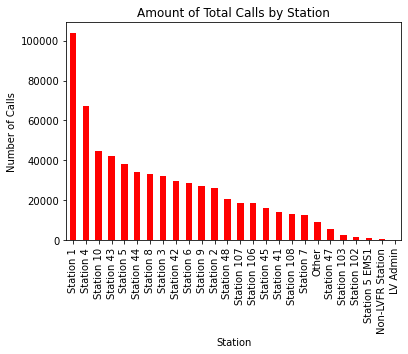

In [18]:
plot_pandas= Stations.plot(kind = "bar", color = 'red')
plt.xlabel('Station')
plt.ylabel('Number of Calls')
plt.title("Amount of Total Calls by Station")
plt.show()

In [19]:
Medical_Incidents = incident_file_final_df.loc[incident_file_final_df["Event_Type"] == "Medical"]
Medical_Calls = Medical_Incidents["Station"].value_counts()

Medical_Calls.head()

Station 1     98886
Station 4     63222
Station 10    41976
Station 43    38318
Station 5     34741
Name: Station, dtype: int64

In [20]:
Fire_Incidents = incident_file_final_df.loc[incident_file_final_df["Event_Type"] == "Fire"]
Fire_Calls = Fire_Incidents["Station"].value_counts()

Fire_Calls.head()

Station 1     2428
Station 4     1820
Station 44    1428
Station 3     1413
Station 8     1395
Name: Station, dtype: int64

In [21]:
Public_Need_Incidents = incident_file_final_df.loc[incident_file_final_df["Event_Type"] == "Public Need"]
Public_Need_Calls = Public_Need_Incidents["Station"].value_counts()

Public_Need_Calls.head()

Station 107    2830
Station 5      1994
Station 1      1828
Station 2      1793
Station 43     1771
Name: Station, dtype: int64

In [22]:
Other_Incidents = incident_file_final_df.loc[incident_file_final_df["Event_Type"] == "Other"]
Other_Calls = Other_Incidents["Station"].value_counts()

Other_Calls.head()

Station 1      805
Station 44     705
Station 43     416
Station 48     412
Station 102    390
Name: Station, dtype: int64

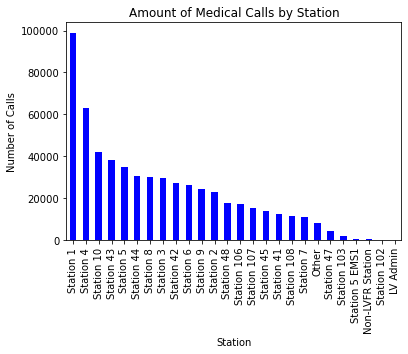

In [23]:
plot_pandas= Medical_Calls.plot(kind = "bar", color = 'blue')
plt.xlabel('Station')
plt.ylabel('Number of Calls')
plt.title("Amount of Medical Calls by Station")
plt.show()

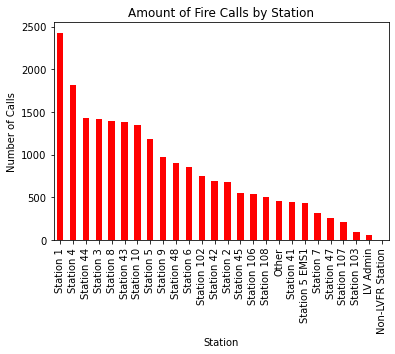

In [24]:
plot_pandas= Fire_Calls.plot(kind = "bar", color = 'red')
plt.xlabel('Station')
plt.ylabel('Number of Calls')
plt.title("Amount of Fire Calls by Station")
plt.show()

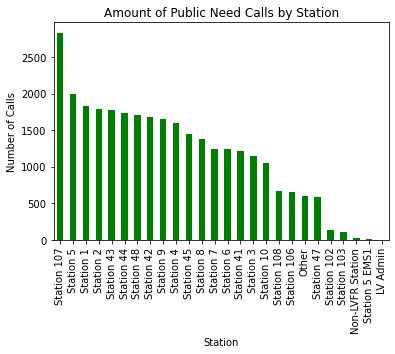

In [25]:
plot_pandas= Public_Need_Calls.plot(kind = "bar", color = 'green')
plt.xlabel('Station')
plt.ylabel('Number of Calls')
plt.title("Amount of Public Need Calls by Station")
plt.show()

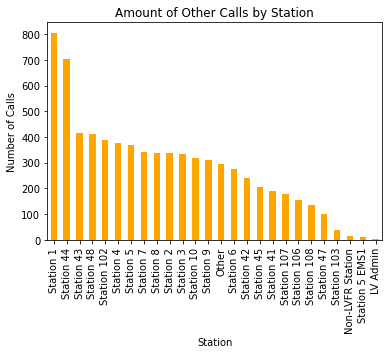

In [26]:
plot_pandas= Other_Calls.plot(kind = "bar", color = 'orange')
plt.xlabel('Station')
plt.ylabel('Number of Calls')
plt.title("Amount of Other Calls by Station")
plt.show()

In [27]:
Event_Type = incident_file_final_df["Event_Type"].unique()

In [28]:
incident_file_final_df.head()

,Station,Response_Date,Event_Type,First_Unit_Assigned,First_Unit_Arrived,Location,Location_1,Response Time
0,Station 4,2011/07/01 00:00:00+00,Medical,2011-07-01 00:01:00,2011-07-01 00:06:00,S Maryland Pky & E Carson Ave,"(36.16462708, -115.1334076)",5.0
1,Station 44,2011/07/01 00:05:00+00,Medical,2011-07-01 00:06:00,2011-07-01 00:12:00,100 block of Lotus Blossom Ct,"(36.17433167, -115.2525711)",6.0
2,Station 3,2011/07/01 00:22:00+00,Fire,2011-07-01 00:24:00,2011-07-01 00:27:00,N RANCHO DR & W WASHINGTON AVE,"(36.18107986, -115.1791687)",3.0
3,Station 10,2011/07/01 00:22:00+00,Medical,2011-07-01 00:23:00,2011-07-01 00:29:00,2200 block of S Las Vegas Blvd,"(36.1462059, -115.1557083)",6.0
4,Other,2011/07/01 00:23:00+00,Public Need,2011-07-01 00:24:00,2011-07-01 00:31:00,7300 block of Breezy Night Ct,"(36.2447052, -115.2542267)",7.0


In [29]:
#Analyzing incidents by Event Type
Calls = incident_file_final_df["Event_Type"].value_counts()

In [30]:
Calls

Medical        581190
Public Need     30120
Fire            21095
Other            7297
Name: Event_Type, dtype: int64

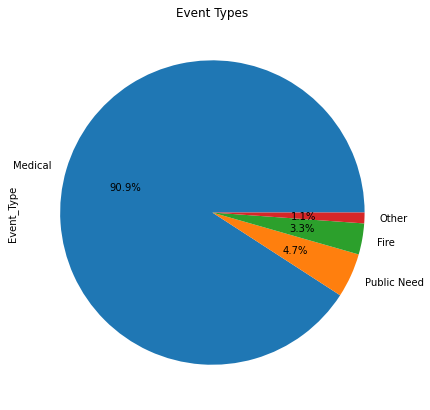

In [31]:
Calls.plot(kind='pie', startangle = 360, autopct ='%1.1f%%', figsize=(7, 7))
plt.title("Event Types")
plt.show()

<AxesSubplot:ylabel='Event_Type'>

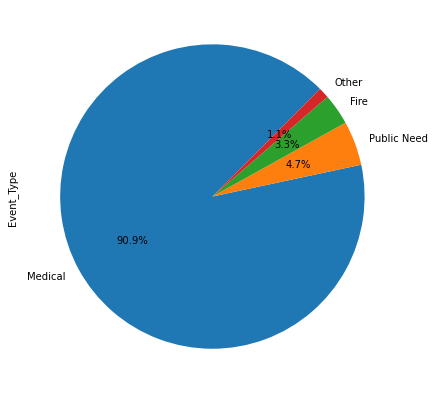

In [32]:
Calls.plot.pie(startangle=45,autopct='%1.1f%%', figsize=(7, 7))

In [33]:
Medicalcheck = incident_file_final_df.loc[incident_file_final_df["Event_Type"] == "Medical"]

In [34]:
Medicalcheck.head()

,Station,Response_Date,Event_Type,First_Unit_Assigned,First_Unit_Arrived,Location,Location_1,Response Time
0,Station 4,2011/07/01 00:00:00+00,Medical,2011-07-01 00:01:00,2011-07-01 00:06:00,S Maryland Pky & E Carson Ave,"(36.16462708, -115.1334076)",5.0
1,Station 44,2011/07/01 00:05:00+00,Medical,2011-07-01 00:06:00,2011-07-01 00:12:00,100 block of Lotus Blossom Ct,"(36.17433167, -115.2525711)",6.0
3,Station 10,2011/07/01 00:22:00+00,Medical,2011-07-01 00:23:00,2011-07-01 00:29:00,2200 block of S Las Vegas Blvd,"(36.1462059, -115.1557083)",6.0
5,Station 44,2011/07/01 00:50:00+00,Medical,2011-07-01 00:51:00,2011-07-01 00:58:00,7300 block of Pinedale Ave,"(36.16988373, -115.2566223)",7.0
6,Station 43,2011/07/01 01:03:00+00,Medical,2011-07-01 01:03:00,2011-07-01 01:11:00,3000 block of N Jones Blvd,"(36.21485901, -115.2254562)",8.0


In [35]:
Medical_Incidents = incident_file_final_df.loc[incident_file_final_df["Event_Type"] == "Medical"]
Medical_Calls = Medical_Incidents["Station"].value_counts()

Medical_Calls.head()

Station 1     98886
Station 4     63222
Station 10    41976
Station 43    38318
Station 5     34741
Name: Station, dtype: int64

In [36]:
response_df = incident_file_final_df[['First_Unit_Assigned','Response Time','Station']]

In [37]:
response_df['Year'] = pd.DatetimeIndex(response_df['First_Unit_Assigned']).year

<ipython-input-37-384dc715daf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['Year'] = pd.DatetimeIndex(response_df['First_Unit_Assigned']).year


In [38]:
response_df

,First_Unit_Assigned,Response Time,Station,Year
0,2011-07-01 00:01:00,5.0,Station 4,2011
1,2011-07-01 00:06:00,6.0,Station 44,2011
2,2011-07-01 00:24:00,3.0,Station 3,2011
3,2011-07-01 00:23:00,6.0,Station 10,2011
4,2011-07-01 00:24:00,7.0,Other,2011
...,...,...,...,...
204032,2018-12-31 23:21:59,6.0,Station 3,2018
204034,2018-12-31 23:33:36,7.0,Station 43,2018
204035,2018-12-31 23:42:56,4.0,Station 10,2018
204036,2018-12-31 23:45:13,5.0,Station 5,2018


In [39]:
avg_pivoted_df = response_df.pivot_table(index='Station', values ='Response Time',columns='Year',aggfunc='mean')

In [40]:
avg_pivoted_df

Year,2011,2012,2013,2014,2015,2016,2017,2018
Station,,,,,,,,
LV Admin,24.000000,6.500000,5.000000,NaN,NaN,9.000000,4.040000,3.666667
Non-LVFR Station,5.000000,7.166667,5.913043,6.294118,9.471074,9.079245,4.750000,4.000000
Other,6.575902,6.532240,7.089018,7.421364,7.232687,9.407035,10.000000,5.931034
Station 1,5.625933,5.714323,5.931722,6.180063,6.511706,6.525470,5.624842,5.307039
Station 10,5.507995,5.582645,5.756452,6.013404,5.973226,6.042117,5.499510,5.074828
Station 102,13.923077,12.740260,20.246753,10.661290,12.102410,22.696262,14.100478,11.919075
Station 103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.590651
Station 106,NaN,5.755329,6.232606,6.643531,6.817490,6.597326,5.854989,5.653546
Station 107,NaN,6.418398,6.440397,6.640678,7.161301,7.232988,6.380919,5.947084


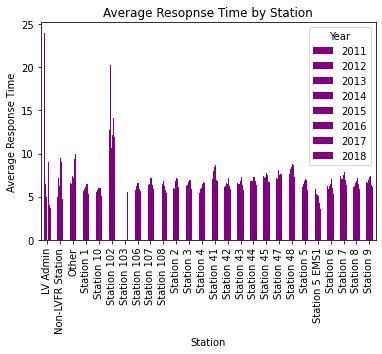

In [41]:
plot_pandas= avg_pivoted_df.plot(kind = "bar", color = 'purple')
plt.xlabel('Station')
plt.ylabel('Average Response Time')
plt.title("Average Resopnse Time by Station")
plt.show()

In [55]:
# avg = avg_pivoted_df.plot(kind='line', xlabel='Station', ylabel='Average Response Time (min)', grid=True,
#                           title='Year Over Year Avg Response Time', figsize=(16,12),linewidth=4)
# avg.legend(bbox_to_anchor=(1,1.02), loc='upper left')


RESPONSE TIMES ANALYSIS (GEORGE)

In [43]:
# New DF with only necessary columns, including Location to help look for duplicate rows
response_df = incident_file_final_df[['First_Unit_Assigned','Response Time']]
#response_df = incident_file_final_df[['Station','First_Unit_Assigned','Response Time','Location']]

# Create Year & Month columns based on First_Unit_Assigned column
response_df['Year'] = pd.DatetimeIndex(response_df['First_Unit_Assigned']).year
response_df['Month'] = pd.DatetimeIndex(response_df['First_Unit_Assigned']).month
#response_df.set_index(['Year','Month'])

response_df.head()

<ipython-input-43-0ddd8e3047fe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['Year'] = pd.DatetimeIndex(response_df['First_Unit_Assigned']).year
<ipython-input-43-0ddd8e3047fe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['Month'] = pd.DatetimeIndex(response_df['First_Unit_Assigned']).month


,First_Unit_Assigned,Response Time,Year,Month
0,2011-07-01 00:01:00,5.0,2011,7
1,2011-07-01 00:06:00,6.0,2011,7
2,2011-07-01 00:24:00,3.0,2011,7
3,2011-07-01 00:23:00,6.0,2011,7
4,2011-07-01 00:24:00,7.0,2011,7


In [44]:
# Pivot the response_df for AVG RESPONSE TIME and prep for year-over-year line chart
avg_pivoted_df = response_df.pivot_table(index='Month', values ='Response Time',columns='Year',aggfunc='mean')
avg_pivoted_df

Year,2011,2012,2013,2014,2015,2016,2017,2018
Month,,,,,,,,
1,NaN,6.052599,6.302976,6.814041,6.969967,7.434864,7.164164,5.987582
2,NaN,5.905113,6.252894,6.877891,6.803448,7.182657,7.069432,5.964659
3,NaN,6.017750,6.444024,6.547103,6.948989,7.034026,7.070537,5.898577
4,NaN,6.204031,6.307426,6.668108,6.934703,7.083601,5.988958,5.855583
5,NaN,6.216521,6.379895,6.495817,6.947832,6.961194,5.976448,5.905446
6,NaN,6.161373,6.440961,6.540444,6.770726,7.082034,5.880101,5.851499
7,6.088711,6.088745,6.371843,6.665616,6.970342,6.883987,5.925258,6.032927
8,6.153011,6.262267,6.465087,6.714441,7.000000,6.998873,5.932586,5.912950
9,6.151515,6.127986,6.389800,6.740736,7.039834,6.886217,5.973957,5.973507


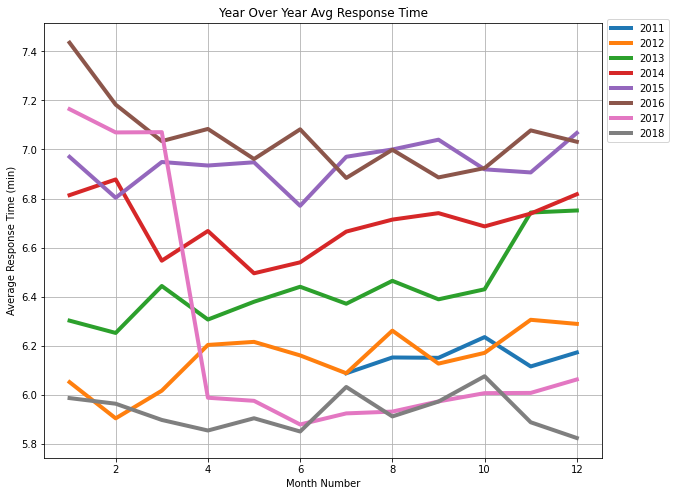

In [45]:
avg = avg_pivoted_df.plot(kind='line', xlabel='Month Number', ylabel='Average Response Time (min)', grid=True,
                          title='Year Over Year Avg Response Time', figsize=(10,8),linewidth=4)
avg.legend(bbox_to_anchor=(1,1.02), loc='upper left')

plt.show()

In [46]:
# Pivot the response_df for INCIDENT COUNTS and prep for year-over-year line chart
count_pivoted_df = response_df.pivot_table(index='Month', values ='Response Time',columns='Year',aggfunc='count')
count_pivoted_df

Year,2011,2012,2013,2014,2015,2016,2017,2018
Month,,,,,,,,
1,NaN,6483.0,7291.0,6937.0,7858.0,7968.0,7992.0,6845.0
2,NaN,6376.0,6133.0,6355.0,6670.0,7588.0,6798.0,6027.0
3,NaN,6986.0,7128.0,7335.0,7959.0,8082.0,7613.0,6675.0
4,NaN,6499.0,6922.0,7171.0,7688.0,7775.0,6792.0,6592.0
5,NaN,7191.0,7252.0,7769.0,7840.0,7808.0,6921.0,7033.0
6,NaN,7021.0,7114.0,7566.0,7973.0,8143.0,7131.0,6505.0
7,6865.0,7099.0,7522.0,7614.0,8126.0,8387.0,6984.0,7137.0
8,6908.0,7092.0,7175.0,7382.0,8001.0,7986.0,6779.0,6996.0
9,6534.0,6782.0,6765.0,7718.0,7707.0,7734.0,6374.0,6530.0


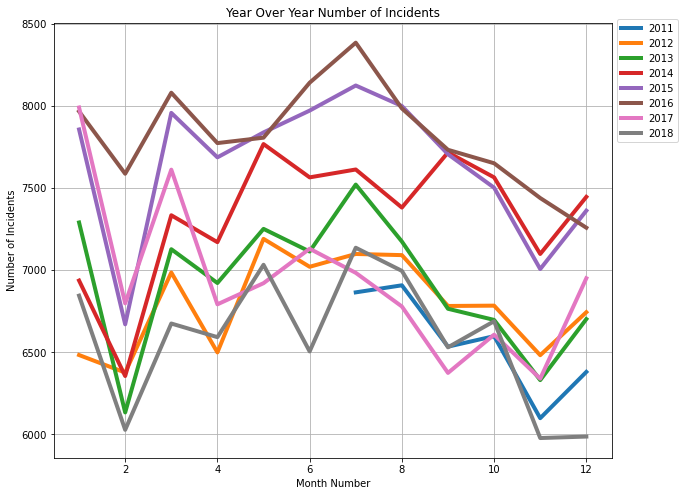

In [47]:
count = count_pivoted_df.plot(kind='line', xlabel='Month Number', ylabel='Number of Incidents', grid=True,
                          title='Year Over Year Number of Incidents', figsize=(10,8),linewidth=4)
count.legend(bbox_to_anchor=(1,1.02), loc='upper left')

plt.show()

HYPOTHESIS TESTING (ANJI)

In [48]:
#Access maps with unique API key
gmaps.configure(api_key=g_key)

In [49]:
#create a map of Firehouse locations
station_locations = clv_stations_df[['LAT','LONG']]

fig = gmaps.figure()
markers = gmaps.marker_layer(station_locations)


   
fig.add_layer(markers)
fig


Figure(layout=FigureLayout(height='420px'))

In [50]:
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

params = {"type" : "station",
          "keyword" : "station",
          "radius" : 50,
          "key" : g_key}

In [51]:
# Use the lat/lng we recovered to identify stations
for index, row in station_locations.iterrows():
    
    # get lat, lng 
    lat = row["LAT"]
    lng = row["LONG"]
  
    
    # change location each iteration while leaving original params in place
    params["location"] = f"{lat},{lng}"
    
    # Use the search term: "Stations" and our lat/lng
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # make request and print url
    station_name = requests.get(base_url, params=params)
    
    # convert to json
    station_name = station_name.json()
  
    
station_locations

,LAT,LONG
0,36.175147,-115.140593
2,36.161596,-115.278456
3,36.180656,-115.177234
4,36.159943,-115.131524
5,36.160133,-115.195485
6,36.152728,-115.233791
7,36.181790,-115.315397
8,36.247375,-115.242632
9,36.154419,-115.163678
25,36.286912,-115.260847


In [52]:
# # # Using the template add the station marks 
info_box_template = """
<dl>
<dt>LAT</dt><dd>{LAT}</dd>
<dt>LONG</dt><dd>{LONG}</dd>
</dl>
"""

# # # Store the DataFrame Row
# # NOTE: be sure to update with your DataFrame name
# station_info = [info_box_template.format(**row) for index, row station_locations.iterrows()]
# locations = station_locations["LAT", "LONG"]

In [53]:
# # Add marker layer ontop of heat map
# markers = gmaps.marker_layer(locations,
#     info_box_content=[f"Station loc: {rate}" for rate in station_locations])

# heatmap.add_layer(markers)

# # Display Map w Markers atop of heatmap
# heatmap